C:\anaconda3\ANACONDA3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


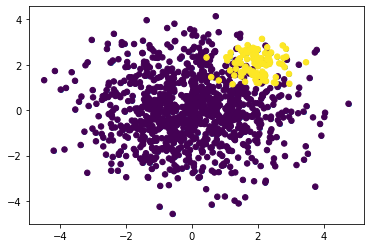

In [1]:
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from matplotlib import animation
import matplotlib.pyplot as plt
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples = [n_samples_1, n_samples_2],
                 centers = centers,
                cluster_std = clusters_std, 
                 random_state = 0, shuffle = False)
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], s=15)
ax = plt.gca()
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=30, c=y)
ax = plt.gca()

In [2]:
X.shape

(1100, 2)

In [122]:
import pandas as pd
df = pd.DataFrame({'x0': X[:,0], 'x1': X[:,1], 'y': y})
df.head()

,x0,x1,y
0,2.646079,0.600236,0
1,1.468107,3.361340,0
2,2.801337,-1.465917,0
3,1.425133,-0.227036,0
4,-0.154828,0.615898,0


In [123]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [125]:
clf = MLPClassifier(solver = 'sgd', random_state=50, max_iter=1000).fit(X_train, y_train)

TypeError: plot_decision_boundary() takes 2 positional arguments but 9 were given

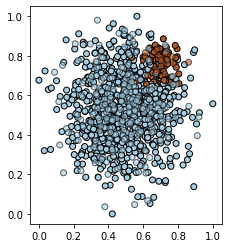

In [126]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline
import numpy as np
alphas = np.logspace(-1, 1, 5)
classifiers = []
names = []
for alpha in alphas:
    classifiers.append(make_pipeline(MinMaxScaler(), MLPClassifier(solver="lbfgs", alpha=alpha, random_state=42, max_iter=1000, hidden_layer_sizes=(200,),),))
    names.append(f"alpha {alpha:.2f}")
figure = plt.figure(figsize=(24, 4))
i=1
ax = plt.subplot(1, len(classifiers) + 1, i)
ax.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='Paired', edgecolors="black")
ax.scatter(X_test[:,0], X_test[:, 1], c=y_test, cmap='Paired', edgecolors="black", alpha=0.6)
i+=1
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    plot_decision_boundary(X_train, X_test, y_train, y_test, clf, score, name, i, len(classifiers)+1)
    i += 1
figure.subplots_adjust(left=0.02, right=0.98)
plt.show()

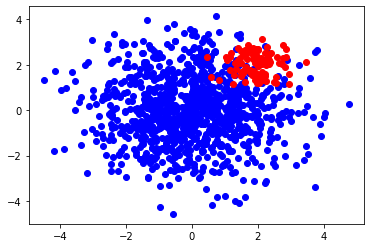

In [130]:
import matplotlib.colors as colors
import numpy as np
def plot_decision_boundary(clf , axes):
    xp=np.linspace(axes[0], axes[1], 300) # Uniform 300 абсцисс
    yp=np.linspace(axes[2], axes[3], 300) # Uniform 300 ординат
    x1, y1=np.meshgrid(xp, yp) # Создать 300x300 очков
    xy=np.c_[x1.ravel(), y1.ravel()] # Соединение по строкам, стандартизованное в формате точки координат
    y_pred = clf.predict(xy).reshape(x1.shape) # Плитка после тренировки
    custom_cmap = colors.ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, y1, y_pred, alpha=0.3, cmap=custom_cmap)
        
plot_decision_boundary(clf, axes=[0, 1, 0, 1])
# Нарисуйте три типа точек
p1=plt.scatter(X[y==0,0], X[y==0, 1], color='blue')
p3=plt.scatter(X[y==1,0], X[y==1, 1], color='red')
# Установить комментарий
plt.show()


In [58]:
y1 = clf.predict(X_train)
y2 = clf.predict(X_test)

In [59]:
from sklearn.model_selection import cross_val_score
#Використаємо cros-validation
cross_val_score(clf, X, y, cv=5)

C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array([0.94090909, 0.95909091, 0.96818182, 0.97727273, 0.96818182])

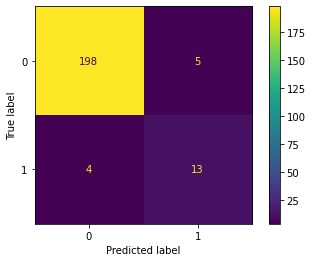

In [60]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()


In [61]:
#апостеріона ймовірність
clf.predict_proba(X_test)[:1]

array([[9.99999995e-01, 5.29002930e-09]])

In [62]:
from sklearn.metrics import precision_score
a = precision_score(y_train, y1)
b = precision_score(y_test, y2)
print("Точність(precision) для навчальної множини:", a)
print("Точність(precision) для тестової множини:", b)

Точність(precision) для навчальної множини: 0.7912087912087912
Точність(precision) для тестової множини: 0.7222222222222222


In [63]:
from sklearn.metrics import recall_score
c = recall_score(y_train, y1)
d = recall_score(y_test, y2)
print("Повнота(recall) для навчальної множини:", c)
print("Повнота(recall) для тестової множини:", d)

Повнота(recall) для навчальної множини: 0.8674698795180723
Повнота(recall) для тестової множини: 0.7647058823529411


Якщо треба мінімізувати FN, то основна увага - на підвищенні Recall



Якщо FP - на підвищенні precision


В нашому випадку треба мінімізувати precision


In [64]:
from sklearn.metrics import f1_score
e = f1_score(y_train, y1)
f = f1_score(y_test, y2)
print ("Міра F1 (F1_score) для навчальної множини:", e)
print("Міра F1 (F1_score) для тестової множини:", f)

Міра F1 (F1_score) для навчальної множини: 0.8275862068965518
Міра F1 (F1_score) для тестової множини: 0.7428571428571428


Text(0.5, 1.0, 'Крива точності-повноти (precision-recall (PR) curve) для навчальної множини')

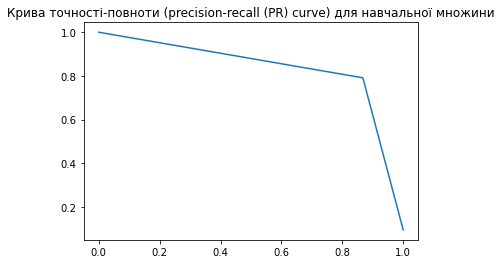

In [65]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train,y1)
plt.plot(recall, precision)
plt.title('Крива точності-повноти (precision-recall (PR) curve) для навчальної множини')

Text(0.5, 1.0, 'Крива точності-повноти (precision-recall (PR) curve) для тестової множини')

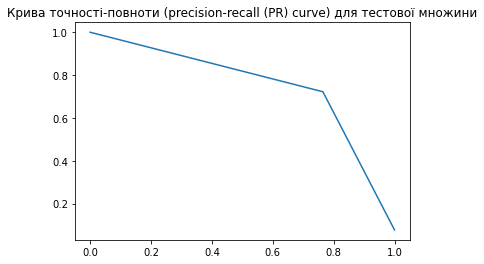

In [66]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y2)
plt.plot(recall, precision)
plt.title('Крива точності-повноти (precision-recall (PR) curve) для тестової множини')

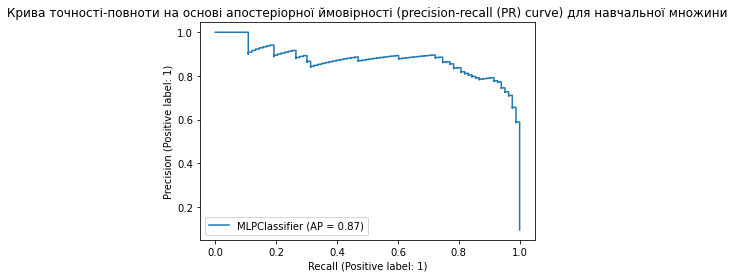

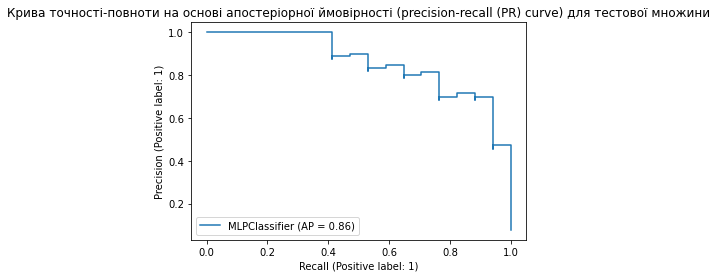

In [67]:
from sklearn.metrics import PrecisionRecallDisplay
predict_proba = clf.predict_proba(X_train)[:, 1]
display = PrecisionRecallDisplay.from_predictions(y_train, predict_proba, name="MLPClassifier")
plt.title('Крива точності-повноти на основі апостеріорної ймовірності (precision-recall (PR) curve) для навчальної множини')
plt.show()
predict_proba = clf.predict_proba(X_test)[:, 1]
display = PrecisionRecallDisplay.from_predictions(y_test, predict_proba, name="MLPClassifier")
plt.title('Крива точності-повноти на основі апостеріорної ймовірності (precision-recall (PR) curve) для тестової множини')
plt.show()


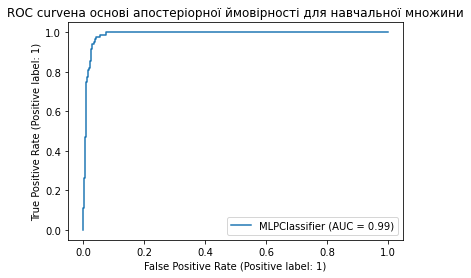

In [68]:
from sklearn.metrics import RocCurveDisplay
predict_proba = clf.predict_proba(X_train)[:, 1]
display = RocCurveDisplay.from_predictions(y_train, predict_proba, name = "MLPClassifier")
display.ax_.set_title("ROC curveна основі апостеріорної ймовірності для навчальної множини")
plt.show() 

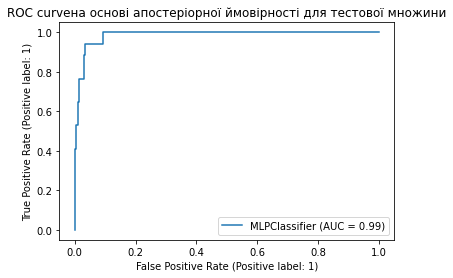

In [69]:
predict_proba = clf.predict_proba(X_test)[:, 1]
display = RocCurveDisplay.from_predictions(y_test, predict_proba, name = "MLPClassifier")
display.ax_.set_title("ROC curveна основі апостеріорної ймовірності для тестової множини")
plt.show() 

In [70]:
from sklearn.metrics import roc_auc_score
print('Показник AUC для начвчльної множини: ', roc_auc_score(y_train, y1))
from sklearn.metrics import roc_auc_score
print('Показник AUC для тестової множини: ', roc_auc_score(y_test, y2))


Показник AUC для начвчльної множини:  0.9218152408882708
Показник AUC для тестової множини:  0.87003767024051


Бачимо, що перенавчання не виявлено

Знайдемо найкращі параметри методом grid search

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid_search = {
    'hidden_layer_sizes': [(200,),(200,10),(200,25),(200,50)],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant','adaptive'],
    'solver': ['lbfgs', 'sgd', 'adam']
}

grid_mlp = GridSearchCV(MLPClassifier(max_iter=1000), param_grid_search, refit = True, verbose = 2)
grid_mlp.fit(X_train, y_train)
print("Tuned hyperparameters (best parameters): ", grid_mlp.best_params_)
print("Best estimator: ", grid_mlp.best_estimator_)
print("Accuracy: ",grid_mlp.best_score_)
best_mlp = MLPClassifier(**grid_mlp.best_params_, max_iter=1000).fit(X_train, y_train)

print('[Train] Score: ', best_mlp.score(X_train, y_train))
print('[Test] Score: ', best_mlp.score(X_test, y_test))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END alpha=0.0001, hidden_layer_sizes=(200,), learning_rate=constant, solver=lbfgs; total time=   1.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(200,), learning_rate=constant, solver=lbfgs; total time=   1.3s
[CV] END alpha=0.0001, hidden_layer_sizes=(200,), learning_rate=constant, solver=lbfgs; total time=   0.9s
[CV] END alpha=0.0001, hidden_layer_sizes=(200,), learning_rate=constant, solver=lbfgs; total time=   1.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(200,), learning_rate=constant, solver=lbfgs; total time=   1.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(200,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END alpha=0.0001, hidden_layer_sizes=(200,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END alpha=0.0001, hidden_layer_sizes=(200,), learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END alpha=0.0001, hidden_layer_sizes=(200,), learning_rate=constant, solver=sgd; to

C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=sgd; total time=   4.1s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=sgd; total time=   0.7s


C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=sgd; total time=   3.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=adam; total time=   1.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=adam; total time=   3.5s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=adam; total time=   3.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=adam; total time=   1.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=adam; total time=   1.5s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=lbfgs; total time=   1.5s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=lbfgs; total time=   2.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=lbfgs; total time=   2.0s
[CV] END alpha=0.

C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=sgd; total time=   5.1s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=sgd; total time=   0.9s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=adam; total time=   2.9s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=adam; total time=   3.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=adam; total time=   3.8s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=adam; total time=   2.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=adam; total time=   2.0s
[CV] END alpha=0.0001, 

C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=sgd; total time=   5.3s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=sgd; total time=   0.9s


C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=sgd; total time=   4.9s


C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=sgd; total time=   4.9s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=adam; total time=   2.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=adam; total time=   3.1s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=adam; total time=   2.1s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=adam; total time=   1.4s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=adam; total time=   1.9s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=lbfgs; total time=   0.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=lbfgs; total time=   2.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=lbfgs; total time=   5.5s
[CV] END alpha=0.

C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=sgd; total time=   6.4s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=sgd; total time=   1.2s


C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=sgd; total time=   6.8s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=adam; total time=   3.1s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=adam; total time=   2.0s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=adam; total time=   2.3s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=adam; total time=   1.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=adam; total time=   2.0s
[CV] END alpha=0.001, hidden_layer_sizes=(200,), learning_rate=constant, solver=lbfgs; total time=   1.2s
[CV] END alpha=0.001, hidden_layer_sizes=(200,), learning_rate=constant, solver=lbfgs; total time=   1.0s
[CV] END alpha=0.001, hidden_layer_sizes=(200,), learning_rate=constant, solver=lbfgs; total time=   2.2s
[CV] END alpha=0.001, hidden_

C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=constant, solver=sgd; total time=   6.2s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=constant, solver=sgd; total time=   0.9s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=constant, solver=adam; total time=   3.5s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=constant, solver=adam; total time=   3.9s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=constant, solver=adam; total time=   3.3s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=constant, solver=adam; total time=   3.6s
[CV] END alpha=0.001, hidden_laye

C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=sgd; total time=   5.5s


C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=sgd; total time=   5.5s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=adam; total time=   3.0s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=adam; total time=   3.2s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=adam; total time=   2.4s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=adam; total time=   2.3s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 10), learning_rate=adaptive, solver=adam; total time=   2.9s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=lbfgs; total time=   1.6s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=lbfgs; total time=   1.6s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=lbfgs; total time=   2.0s
[CV] END alpha=0.001, hidd

C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=sgd; total time=   5.6s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=sgd; total time=   8.2s


C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=sgd; total time=   8.6s


C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=sgd; total time=   9.4s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=adam; total time=   3.3s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=adam; total time=   2.7s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=adam; total time=   1.6s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=adam; total time=   2.1s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=constant, solver=adam; total time=   3.2s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=lbfgs; total time=   4.1s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=lbfgs; total time=   5.2s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=lbfgs; total time=   2.8s
[CV] END alpha=0.001, hidd

C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=sgd; total time=   8.5s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=sgd; total time=   1.2s


C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=sgd; total time=   8.6s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=sgd; total time=   1.5s


C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=sgd; total time=   7.0s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=adam; total time=   3.7s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=adam; total time=   4.8s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=adam; total time=   3.1s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=adam; total time=   3.1s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 25), learning_rate=adaptive, solver=adam; total time=   3.7s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=lbfgs; total time=   1.7s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=lbfgs; total time=   7.2s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=lbfgs; total time=   2.0s
[CV] END alpha=0.001, hidd

C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=sgd; total time=   8.3s


C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=sgd; total time=   8.3s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=sgd; total time=   0.7s


C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=sgd; total time=  12.4s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=adam; total time=   3.9s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=adam; total time=   2.8s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=adam; total time=   4.1s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=adam; total time=   3.9s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=constant, solver=adam; total time=   2.8s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=lbfgs; total time=   9.4s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=lbfgs; total time=   4.4s
[CV] END alpha=0.001, hidden

C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=sgd; total time=   9.4s


C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=sgd; total time=   7.6s


C:\anaconda3\ANACONDA3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=sgd; total time=   7.9s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=sgd; total time=   2.1s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=sgd; total time=   1.9s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=adam; total time=   2.3s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=adam; total time=   1.8s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=adam; total time=   4.0s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=adam; total time=   4.3s
[CV] END alpha=0.001, hidden_layer_sizes=(200, 50), learning_rate=adaptive, solver=adam; total time=   2.6s
Tuned hyperparameters (best parameters):  {'alpha': 0.0001, 'hidden_layer_sizes': (200, 50), 'learning_rate': 'adaptive', 'solver': 'lbfgs'

Tuned hyperparameters (best parameters):  {'alpha': 0.0001, 'hidden_layer_sizes': (200, 25), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
Best estimator:  MLPClassifier(hidden_layer_sizes=(200, 25), learning_rate='adaptive',
              max_iter=1000, solver='lbfgs')
Accuracy:  0.9681818181818181
[Train] Score:  0.9704545454545455
[Test] Score:  0.9545454545454546

Tuned hyperparameters (best parameters):  {'alpha': 0.0001, 'hidden_layer_sizes': (200, 50), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
Best estimator:  MLPClassifier(hidden_layer_sizes=(200, 50), learning_rate='adaptive',
              max_iter=1000, solver='lbfgs')
Accuracy:  0.9681818181818181
[Train] Score:  0.9681818181818181
[Test] Score:  0.9636363636363636

Создамо модель з підібраними методом grid search гіперпараметрами 

In [89]:
clf = MLPClassifier(alpha = 0.0001, hidden_layer_sizes = (200, 25), learning_rate = 'adaptive', solver = 'lbfgs', random_state=50, max_iter=1000).fit(X_train, y_train)

In [90]:
y1 = clf.predict(X_train)
y2 = clf.predict(X_test)

In [91]:
from sklearn.metrics import precision_score
a = precision_score(y_train, y1)
b = precision_score(y_test, y2)
print("Точність(precision) для навчальної множини:", a)
print("Точність(precision) для тестової множини:", b)
    

Точність(precision) для навчальної множини: 0.8043478260869565
Точність(precision) для тестової множини: 0.7647058823529411


In [92]:
from sklearn.metrics import recall_score
c = recall_score(y_train, y1)
d = recall_score(y_test, y2)
print("Повнота(recall) для навчальної множини:", c)
print("Повнота(recall) для тестової множини:", d)

Повнота(recall) для навчальної множини: 0.891566265060241
Повнота(recall) для тестової множини: 0.7647058823529411


# Б)


(500, 2)
(500,)


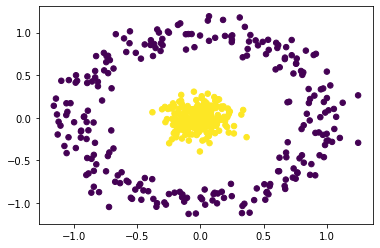

In [153]:
from sklearn.datasets import make_circles
X, y = make_circles(500 , factor=.1 , noise =.1)
print(X.shape)
print(y.shape)
ax = plt.gca()
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], s=30, c=y)
ax = plt.gca()

In [154]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)


In [155]:
mdl = MLPClassifier(solver = 'lbfgs', random_state=50, max_iter=1000).fit(X_train, y_train)

In [156]:
y1 = mdl.predict(X_train)
y2 = mdl.predict(X_test)

In [157]:
from sklearn.metrics import precision_score
a = precision_score(y_train, y1)
b = precision_score(y_test, y2)
print("Точність(precision) для навчальної множини:", a)
print("Точність(precision) для тестової множини:", b)

Точність(precision) для навчальної множини: 1.0
Точність(precision) для тестової множини: 1.0


In [158]:
from sklearn.metrics import recall_score
c = recall_score(y_train, y1)
d = recall_score(y_test, y2)
print("Повнота(recall) для навчальної множини:", c)
print("Повнота(recall) для тестової множини:", d)

Повнота(recall) для навчальної множини: 1.0
Повнота(recall) для тестової множини: 1.0


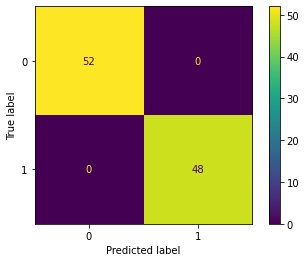

In [159]:
cm = confusion_matrix(y_test, y2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mdl.classes_)
disp.plot()

plt.show()


In [160]:
scaler=MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

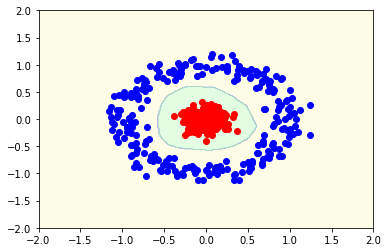

In [161]:
def plot_decision_boundary(mdl , axes):
    xp=np.linspace(axes[0], axes[1], 300) # Uniform 300 абсцисс
    yp=np.linspace(axes[2], axes[3], 300) # Uniform 300 ординат
    x1, y1=np.meshgrid(xp, yp) # Создать 300x300 очков
    xy=np.c_[x1.ravel(), y1.ravel()] # Соединение по строкам, стандартизованное в формате точки координат
    y_pred = mdl.predict(xy).reshape(x1.shape) # Плитка после тренировки
    custom_cmap = colors.ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, y1, y_pred, alpha=0.3, cmap=custom_cmap)
        
plot_decision_boundary(mdl, axes=[-2, 2, -2, 2])
# Нарисуйте три типа точек
p1=plt.scatter(X[y==0,0], X[y==0, 1], color='blue')
p3=plt.scatter(X[y==1,0], X[y==1, 1], color='red')
# Установить комментарий
plt.show()


In [162]:
from sklearn.metrics import f1_score
e = f1_score(y_train, y1)
f = f1_score(y_test, y2)
print ("Міра F1 (F1_score) для навчальної множини:", e)
print("Міра F1 (F1_score) для тестової множини:", f)

Міра F1 (F1_score) для навчальної множини: 1.0
Міра F1 (F1_score) для тестової множини: 1.0


Text(0.5, 1.0, 'Крива точності-повноти (precision-recall (PR) curve) для навчальної множини')

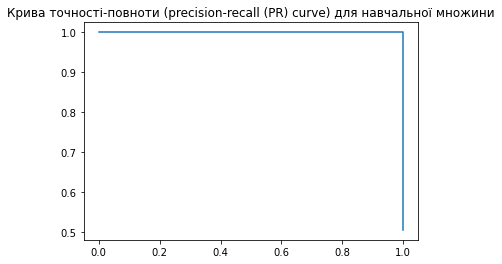

In [163]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train,y1)
plt.plot(recall, precision)
plt.title('Крива точності-повноти (precision-recall (PR) curve) для навчальної множини')

Text(0.5, 1.0, 'Крива точності-повноти (precision-recall (PR) curve) для тестової множини')

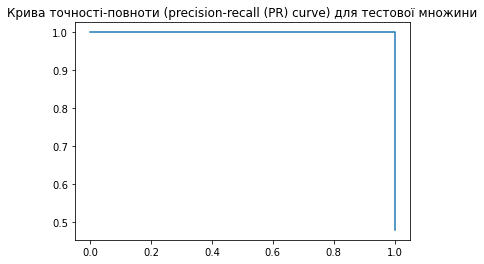

In [164]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y2)
plt.plot(recall, precision)
plt.title('Крива точності-повноти (precision-recall (PR) curve) для тестової множини')

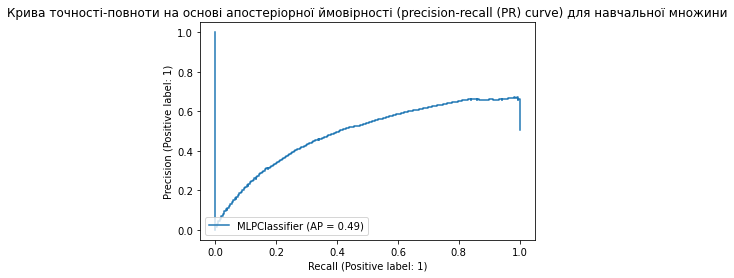

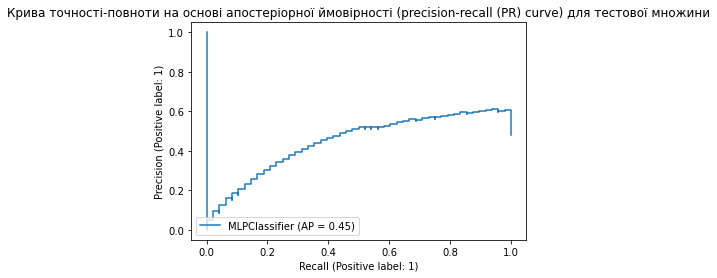

In [165]:
from sklearn.metrics import PrecisionRecallDisplay
predict_proba = mdl.predict_proba(X_train)[:, 1]
display = PrecisionRecallDisplay.from_predictions(y_train, predict_proba, name="MLPClassifier")
plt.title('Крива точності-повноти на основі апостеріорної ймовірності (precision-recall (PR) curve) для навчальної множини')
plt.show()
predict_proba = mdl.predict_proba(X_test)[:, 1]
display = PrecisionRecallDisplay.from_predictions(y_test, predict_proba, name="MLPClassifier")
plt.title('Крива точності-повноти на основі апостеріорної ймовірності (precision-recall (PR) curve) для тестової множини')
plt.show()


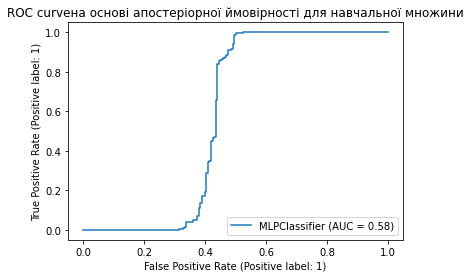

In [166]:
from sklearn.metrics import RocCurveDisplay
predict_proba = mdl.predict_proba(X_train)[:, 1]
display = RocCurveDisplay.from_predictions(y_train, predict_proba, name = "MLPClassifier")
display.ax_.set_title("ROC curveна основі апостеріорної ймовірності для навчальної множини")
plt.show() 

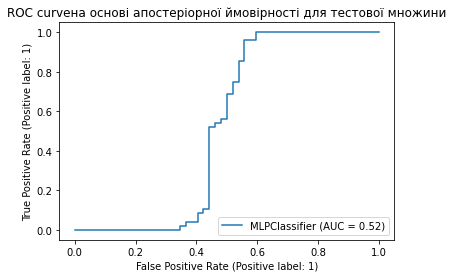

In [167]:
predict_proba = mdl.predict_proba(X_test)[:, 1]
display = RocCurveDisplay.from_predictions(y_test, predict_proba, name = "MLPClassifier")
display.ax_.set_title("ROC curveна основі апостеріорної ймовірності для тестової множини")
plt.show() 

In [169]:
from sklearn.metrics import roc_auc_score
print('Показник AUC для начвчльної множини: ', roc_auc_score(y_train, y1))
from sklearn.metrics import roc_auc_score
print('Показник AUC для тестової множини: ', roc_auc_score(y_test, y2))


Показник AUC для начвчльної множини:  1.0
Показник AUC для тестової множини:  1.0


Друга модель приймає ідеальний вигляд, а от з першим датасетом треба було попрацювати, підібравши гіперпараметри за допомогою grid search